#Optimization Problem

## Goal of Optimization

The goal of optimization is to **find the value of $( x $)** where  
the function $( f(x) $) reaches its **minimum** or **maximum** value.

$$
\text{Goal:} \quad \min_{x} f(x) \quad \text{or} \quad \max_{x} f(x)
$$



## In Neural Networks

In neural networks, we aim to **minimize the prediction error**  
by finding the set of optimal weights $( w^* $):

$$
w^{*} = \arg\min_{w} J(w)
$$

Where:
- $( J(w) $): loss (or cost) function — measures prediction error  
- $( w $): network parameters (weights and biases)

---

### Intuitive Explanation

Simply put:  
we want to determine the **direction and magnitude of the step**  
that most rapidly **reduces the loss** during training.

This process forms the foundation of all gradient-based learning algorithms.


##Loss Surface

The loss surface shows how the error changes based on the network weights.

- For neural networks, the loss surface is usually **non-convex **
  because of multiple layers, **nonlinear activations**,
  and complex parameter interactions.
  This creates **many local minima and saddle points**.

- In large neural networks, most local minima have similar loss values
  close to the global minimum, so getting stuck in one is not a big problem.

- In smaller networks, local minima can have much higher loss values
  compared to the global minimum, making training more difficult.


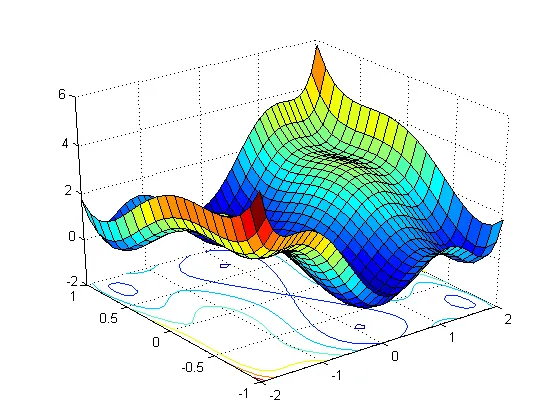

## Loss Optimization

- **Goal:** How can we optimize a non-convex loss function effectively?

- **Gradient Descent:**  
  This method finds the direction of the steepest descent
  and updates the parameters to minimize the loss function.

- **Newton's Method:**  
  This method finds critical points where the derivative \( f'(x) = 0 \),
  which can correspond to minima, maxima, or saddle points.  
  Newton's Method uses the **second derivative (Hessian)**
  to adjust the step size, which often leads to **faster convergence**
  compared to Gradient Descent.


# Gradient Descent

## Motivation

**Gradient Descent** is the core optimization algorithm used to train neural networks.  
In each iteration, parameters are updated in the direction of the **negative gradient** of the loss function.

While effective for **convex** functions, standard Gradient Descent struggles with **non-convex** loss surfaces,  
which are common in neural networks.

### Problems with Vanilla Gradient Descent:
- It can easily **get stuck in local minima**.  
- It may **oscillate** in narrow valleys or flat regions.  
- Its performance is **highly sensitive** to the learning rate.

**Formally, the parameter update rule is:**

$$
\theta_{t+1} = \theta_t - \eta \, \nabla_{\theta} L(\theta_t)
$$
Where:
- $( \eta $) → learning rate  
- $( \nabla_{\theta} L(\theta_t) $) → gradient of the loss with respect to parameters  


###Types of Gradient Descent:
- Batch: Full dataset for stable but **slow** updates.
- Stochastic (SGD): One data point for fast, **noisy** updates.
- Mini-Batch: Small batches, **balancing speed and stability.**

### Problems with Gradient Descent
- **High Variability**(SGD): Quick in steep directions but slow in shallow ones, causing **jitter and slow progress.**
- **Local Minima** and **Saddle Points**: Risk of **sub-optimal solutions** or long convergence times in flat regions.
- **Noisy Updates**: Using individual points or mini-batches introduces noise, affecting
stable convergence.

#Momentum Optimization

## Problem Definition

### **Objective**
Enhance the vanilla **Gradient Descent** algorithm to improve **convergence** and **stability**.

---

### **Challenges**
- Selecting an appropriate **learning rate** is crucial.  
  - Too small → slow convergence.  
  - Too large → divergence or getting stuck in local minima.

---

### **Proposed Solution**
Instead of testing multiple learning rates manually, introduce **Momentum** to adaptively adjust
the learning rate based on oscillations:

- **Increase** step size in stable directions.  
- **Decrease** step size in oscillating or unstable directions.


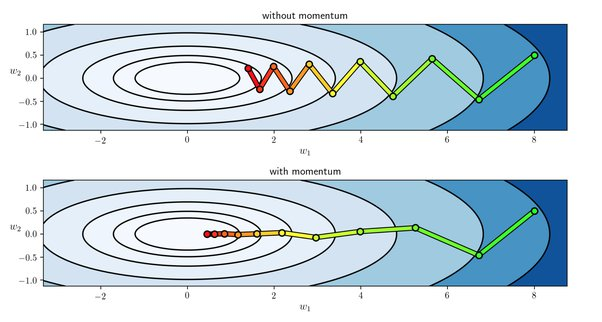

## What is Momentum?

**Momentum** is a concept from **physics** where an object’s motion depends not only on the **current force**,  
but also on its **previous velocity**.  

In the context of **gradient optimization**, it refers to a method that **smooths the optimization trajectory**  
by adding a term that helps the optimizer *remember the past gradients*.

## types of Momentum: First and Second Moment

Momentum can be thought of in **two parts**: the **first moment** and the **second moment**.


### 1. First Momentum

- The **first moment** is the standard momentum we’ve discussed so far.  
- It tracks the **moving average of past gradients**:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(w_t)
$$

$$
w_{t+1} = w_t - \eta m_t
$$

- **Purpose:**  
  - Smooths the update trajectory  
  - Maintains direction across iterations  
  - Helps escape shallow local minima

- **Hyperparameter:**  
  - $(\beta_1$) (momentum factor, usually ~0.9)
   - $(\eta $ ): learning rate

- **Why Use First Momentum?**  
  - Inspired by rolling momentum, it smooths and accelerates learning.  
  - Ideal for traversing narrow valleys or regions where standard gradient descent oscillates.



### 2️. Second Momentum (RMSprop)

- The **second moment** tracks the **moving average of the squared gradients**:
**Update Rule:**
$$
v_{t+1} = \beta_2 v_t + (1 - \beta_2) (\nabla_w J(w_t))^2
$$

$$
w_{t+1} = w_t - \eta \frac{\nabla_w J(w_t)}{\sqrt{v_{t+1} + \epsilon}}
$$

- **Purpose:**  
  - Adjusts step size dynamically for each parameter  
  - Reduces oscillations in steep or noisy directions  
  - Improves convergence speed and stability

- **Hyperparameters:**  
  - $(\beta_1 \approx 0.9$) (first moment)  
  - $(\beta_2 \approx 0.999$) (second moment)  
  - $(\epsilon \approx 10^{-8}$) (to avoid division by zero)

### RMSprop (Root Mean Square Propagation)
**RMSProp** is essentially the **second-moment component of Adam** without the **first-moment (momentum)** term.


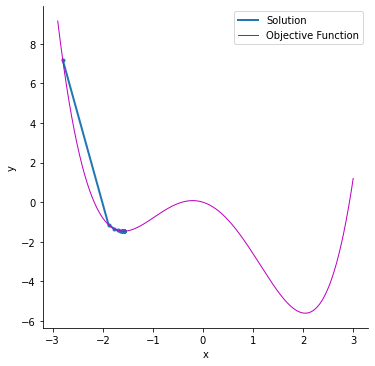
>Stochastic gradient descent without
momentum stops at a local minimum

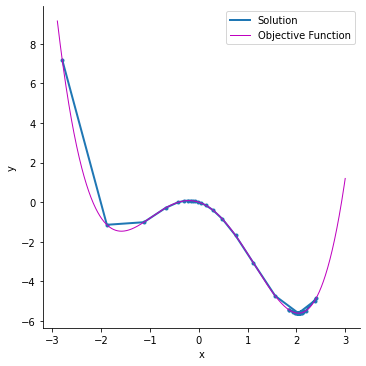
> Stochastic gradient descent with
momentum stops at the global minimum.

### 3️. Moment Bias Correction

- **Problem:**  
  $(m_t$) and $(v_t$) are initialized to zero, causing a **bias toward zero** in early steps.

- **Solution:**  
  Use bias-corrected estimates:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

- **Purpose:**  
  Compensates for early-step bias, ensuring more **accurate moment estimates**, especially when $(t$) is small.


### Conclusion

- **First Momentum** → moving average of gradients (**velocity**)  
  - This is the **classic momentum** that smooths the optimization path  
    and helps escape small local minima.

- **Second Momentum** → moving average of squared gradients  
  - This is the **adaptive part in Adam**, which adjusts step sizes based on  
    the magnitude and variability of gradients.

- **Combination (Adam)**  
  - Combining first and second momentum allows Adam to find a more efficient path  
    while **automatically adapting step sizes**.

---

###  Simplified View

- **First momentum** = direction of movement  
- **Second momentum** = step size  
- **Adam** = combination of both


# Introduction to Adam Optimizer

## **Origin and Purpose**  
  - Proposed in 2014 by **Diederik Kingma** and **Jimmy Ba**, Adam (Adaptive Moment Estimation)  
    addresses key limitations of earlier optimization methods by combining **momentum** and **adaptive learning rates**.  
  - Adam is designed to handle **sparse gradients** and **noisy updates** by adjusting the learning rate  
    for each parameter individually based on historical gradients.

- **Core Idea:**  
  - Adam maintains **two moving averages**:  
    1. **First moment** — mean of gradients  
    2. **Second moment** — variance of gradients  
  - This allows Adam to **adapt learning rates** for each parameter individually,  
    improving convergence speed and stability.


## **Why Adaptive Rates?**  
  - Unlike traditional SGD, Adam **adapts the learning rate** for each parameter based on recent gradient magnitudes.  
  - Large gradients → reduced update sizes  
  - Small gradients → larger updates  
  - This balances **convergence speed** and **stability**.




## Mathematical Formulation of Adam

- **Adam Update Rules:**

1. **First Moment Estimate:**

$$
m_{t+1} = \beta_1 m_t + (1 - \beta_1) \nabla_w J(w_t)
$$

2. **Second Moment Estimate:**

$$
v_{t+1} = \beta_2 v_t + (1 - \beta_2) (\nabla_w J(w_t))^2
$$

3. **Bias-Corrected Moments:**  
   (to address initialization bias)

$$
\hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}}, \quad
\hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}
$$

4. **Parameter Update Rule:**

$$
w_{t+1} = w_t - \eta \frac{\hat{m}_{t+1}}{\sqrt{\hat{v}_{t+1} + \epsilon}}
$$

---

**Where:**
- $( \beta_1, \beta_2 $): Exponential decay rates for the moment estimates  
- $( \eta $): Learning rate  
- $( \epsilon $): Small constant to prevent division by zero  
- $( \nabla_w J(w_t) $): Gradient of the loss function at step *t*


##  How Adam Works

1. **Moment Estimation:**  
   Adam maintains two moving averages:  
   - The **first moment** — the mean of the gradients (momentum).  
   - The **second moment** — the mean of the squared gradients (adaptive scaling).

2. **Adaptive Learning Rates:**  
   Each parameter gets its **own learning rate** based on these moment estimates:  
   - Parameters with **large gradients** receive **smaller updates**.  
   - Parameters with **small gradients** receive **larger updates**.  
   This allows Adam to balance **speed** and **stability** dynamically.

3. **Bias Correction:**  
   Because both moments are initialized at zero, their early estimates are biased.  
   Adam includes **bias-correction terms** to ensure more accurate moment estimates during initial training steps.

4. **Parameter Update Rule:**  
   The final update combines:  
   - The **momentum** from past gradients (for direction).  
   - The **adaptive scaling** from second moments (for step size).  
   Together, they make Adam both **fast** and **stable** in optimization.


## Advantages of Adam

- **Fast convergence:**  
  Adam adaptively adjusts the learning rate for each parameter, often reaching minimum loss faster than traditional methods.

- **Handles sparse data:**  
  Performs effectively in scenarios with sparse gradients, such as **Natural Language Processing (NLP)** and **Computer Vision (CV)** tasks.

- **Works well with default settings:**  
  Adam is robust and typically performs well across a wide range of tasks **without heavy hyperparameter tuning**.

- **Good for high-dimensional spaces:**  
  The algorithm scales efficiently and performs well in the **high-dimensional parameter spaces** common in deep learning models.



## Potential Drawbacks

- **Generalization issues:**  
  Some studies have shown that **Adam may not generalize as well as SGD**, especially in certain deep learning problems like image classification.

- **Non-convergence:**  
  In some cases, Adam can **fail to converge** to the optimal solution, while **SGD** (with momentum) might still succeed.


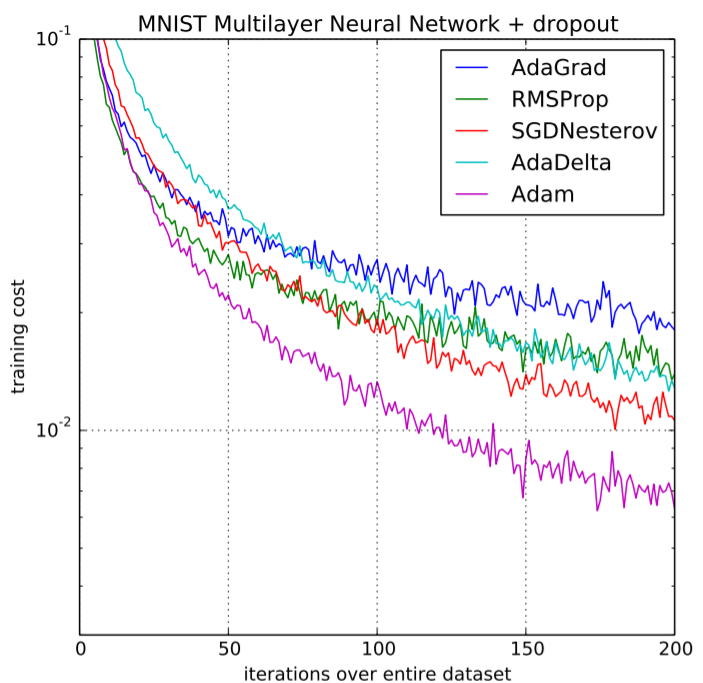

# Newton’s optimization Method

## Newton’s Method

- **Concept:**  
  The **Newton–Raphson method**, or simply **Newton’s method**, is a numerical technique originally developed to find the **roots** of an equation — that is, the values of $( x $) where $( f(x) = 0 $).
- **But what about more complex equations?**  
  When an analytical solution is not possible, we can use **Newton’s method** as an **iterative numerical approach** to approximate the roots.



## Objective: Derive Newton’s Method via the Tangent Line

**Objective:**  
Derive Newton’s method by finding the equation of the tangent line of $(f(x)$) at a point $(x_0$), and use that tangent to approximate a root.

---

### Tangent line at $(x_0$)

Given a point $(x_0$) (where $(f(x_0) \neq 0$)), the tangent line to $(f(x)$) at $(x_0$) has slope equal to the derivative at that point.

- **Slope (gradient):**
 $$
  m = f'(x_0)
 $$

- **Tangent line equation (point-slope form):**
  $$
  y = f'(x_0)\,(x - x_0) + f(x_0)
 $$

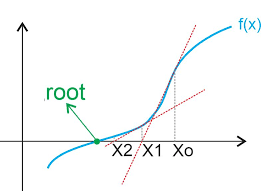

---

### Use the tangent to find the next approximation

To find where the function crosses the x-axis (i.e. a root), set $(y = 0$) on the tangent line and solve for $(x$):

$$
0 = f'(x_0)\,(x - x_0) + f(x_0)
$$

Solving for $(x$) gives the next estimate $(x_1$):

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

---

### General iterative formula (Newton–Raphson)

Repeating this procedure leads to the Newton update rule:
$$
x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}
$$

This iteration typically converges very quickly when the initial guess $(x_0$) is close to a simple root and $(f'$) is not zero.




**Limitations**
- Requires computation of the **derivative** $( f'(x) $).  
- Can **diverge** if the initial guess is poor or if $( f'(x) $) is close to zero.  
- Not suitable for functions with **flat regions** or **discontinuous derivatives**.

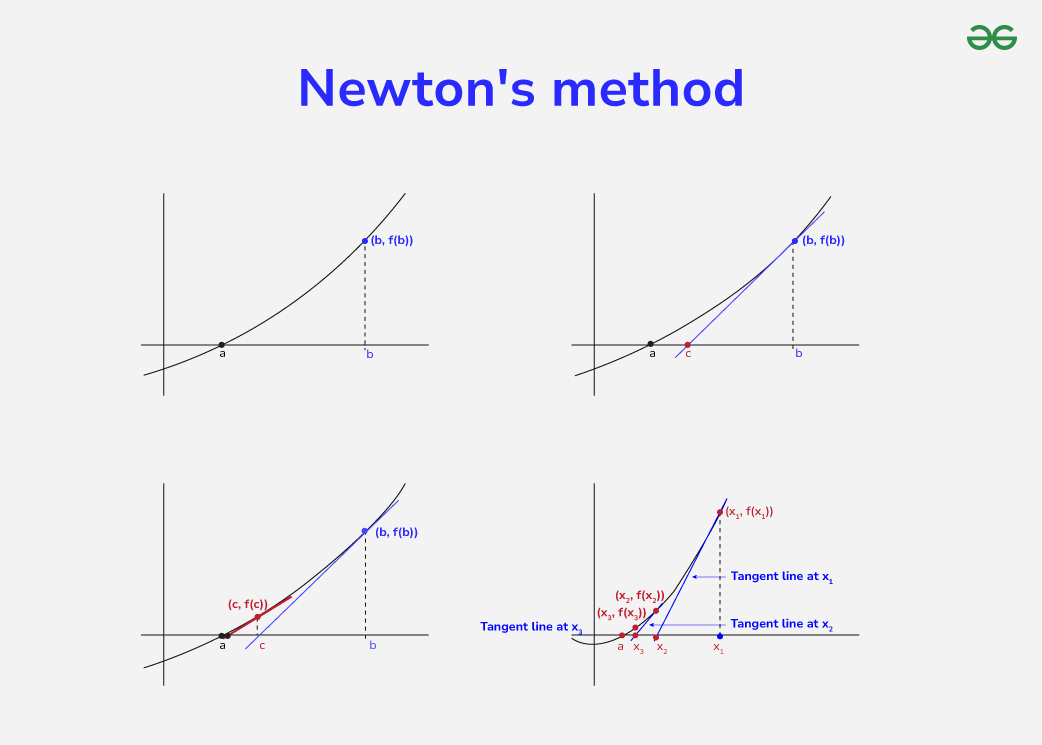

##  Newton’s Method: Advantages and Disadvantages

Newton’s method provides powerful optimization capabilities but also has some practical limitations, especially for large-scale machine learning problems.  
The table below summarizes the key points:

| **Advantages** | **Disadvantages** |
|-----------------|------------------|
| **Faster Convergence**  | **Computationally Expensive** |
| Quadratic convergence allows faster movement toward minima in convex problems. | Requires Hessian computation, which is costly in high-dimensional models. |
| **Adaptive Step Sizes** | **Memory Intensive** |
| Step sizes are adjusted based on curvature, avoiding slow progress in flat regions. | Storing and inverting the Hessian matrix can be very memory-heavy for large models. |
| **Reduced Oscillations** | **Convergence Challenges** |
| Curvature information helps stabilize optimization in oscillatory regions. | May converge to saddle points in non-convex functions common in deep learning. |

